<a href="https://colab.research.google.com/github/AryaWiratama26/EDA1/blob/main/Belajar_EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library yang dibutuhkan

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Baca file csv dan menampilkan 5 data teratas

In [65]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Menampilkan 5 data terbawah

In [66]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Mengecek tipe data

In [67]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


# Menghapus data duplikat

In [68]:
df.count()

,0
age,1338
sex,1338
bmi,1338
children,1338
smoker,1338
region,1338
charges,1338


In [69]:
df_duplicates = df[df.duplicated()]
print(df_duplicates.shape)

(1, 7)


In [70]:
df.count()

,0
age,1338
sex,1338
bmi,1338
children,1338
smoker,1338
region,1338
charges,1338


In [71]:
df.shape

(1338, 7)

In [72]:
df = df.drop_duplicates()
df.count()

,0
age,1337
sex,1337
bmi,1337
children,1337
smoker,1337
region,1337
charges,1337


# Menghapus data kosong (walaupun tidak ada, saya akan coba)

In [73]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [74]:
df = df.dropna()
df.count()

,0
age,1337
sex,1337
bmi,1337
children,1337
smoker,1337
region,1337
charges,1337


# Mendeteksi Outliers

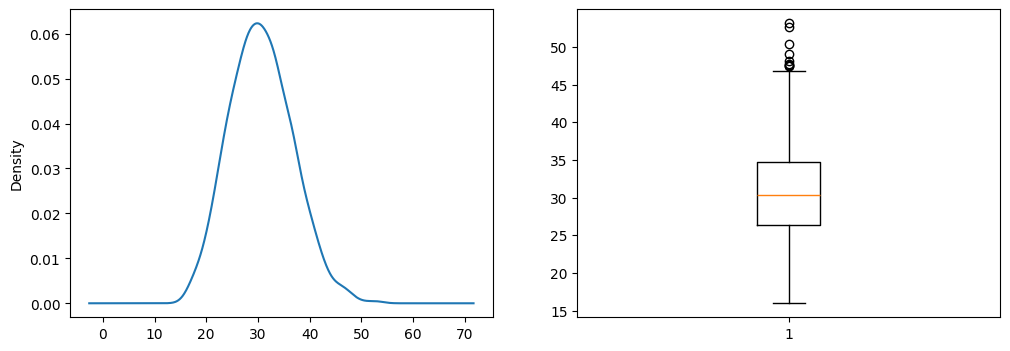

In [75]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['bmi'].plot(kind="kde")
f.add_subplot(1,2,2)
plt.boxplot(df['bmi'])
plt.show()

<Axes: xlabel='charges'>

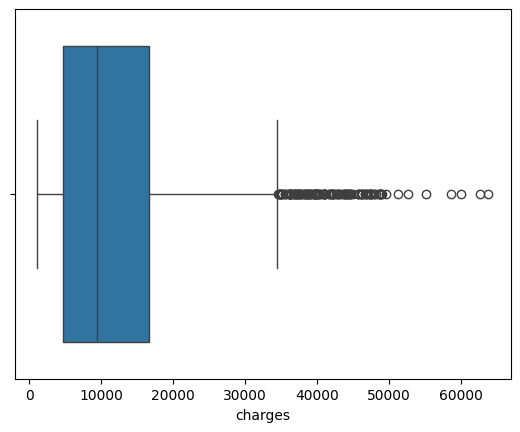

In [76]:
sns.boxplot(x = df['charges'])

<Axes: xlabel='bmi'>

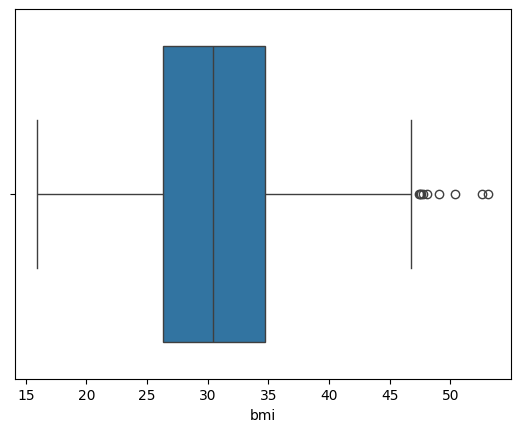

In [77]:
sns.boxplot(x = df['bmi'])

# Histogram

In [78]:
df.charges.describe()

,charges
count,1337.000000
mean,13279.121487
std,12110.359656
min,1121.873900
25%,4746.344000
50%,9386.161300
75%,16657.717450
max,63770.428010


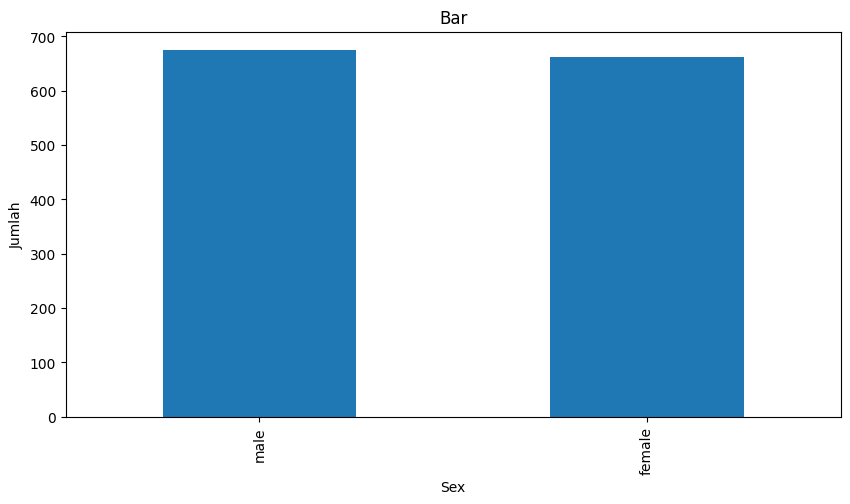

In [79]:
df.sex.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Bar")
plt.ylabel("Jumlah")
plt.xlabel("Sex")
plt.show()

# Heat Maps

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


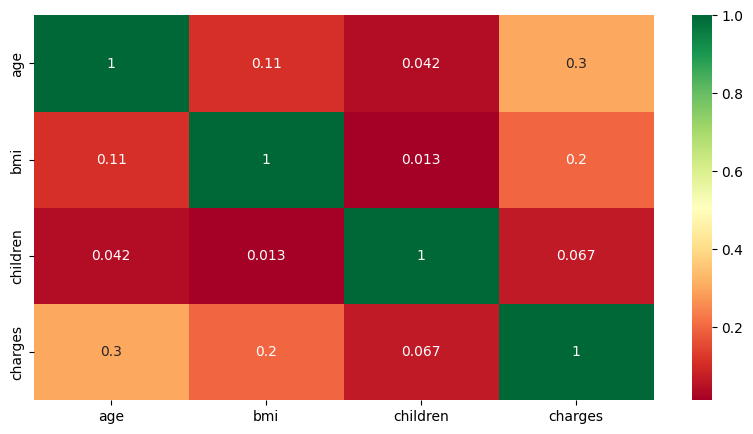

In [82]:
plt.figure(figsize=(10,5))
c = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(c,cmap="RdYlGn", annot=True)
c